## Business Goal.
Build a model for the demand of shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

## Step 1 - Reading and Understanding the Data.

In [2]:
bikes = pd.read_csv(r"C:\Users\FS066229\OneDrive - Cerner Corporation\Documents\Python\LR assignment\day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikes.shape

(730, 16)

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2 - Preparing the data for data modelling.

### Converting the numeric variables to categorical variables.

In [6]:
bikes['season'] = bikes['season'].astype(str)

In [7]:
bikes['season'] = bikes['season'].replace(['1','2','3','4'],['spring','summer','autumn','winter'])
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bikes['weathersit'] = bikes['weathersit'].astype(str)

In [9]:
bikes['weathersit'] = bikes['weathersit'].replace(['1','2','3','4'],['Clear and Partly Cloudy','Mist and Cloudy','Light Rain and Light Snow','Heavy Rain and Snow'])
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear and Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear and Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear and Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Exploratory Data Analysis

### Univariate Analysis-

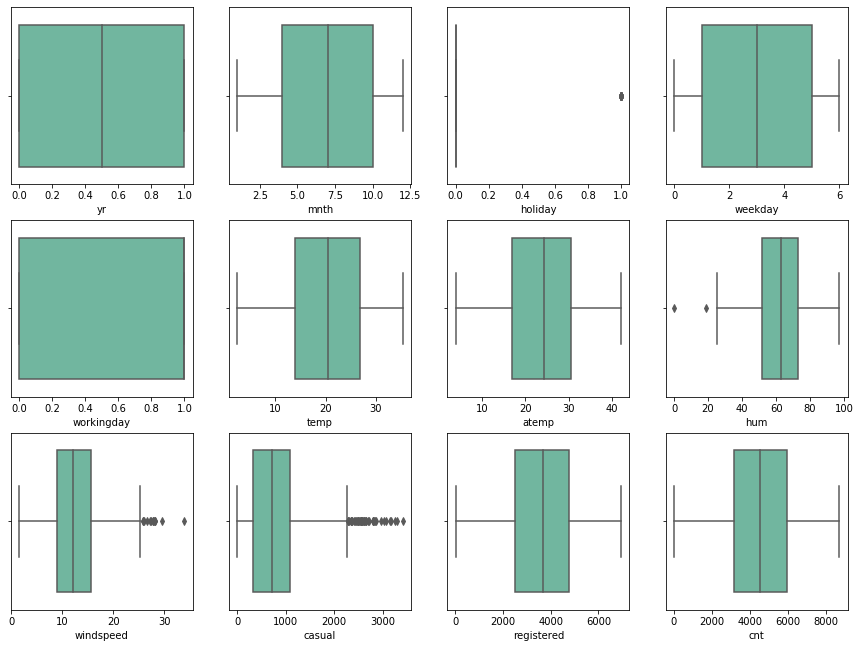

In [10]:
# Checking the outliers.
plt.figure(figsize = (15,15))
plt.subplot(4,4,1)
sns.boxplot(bikes['yr'], palette = 'BuGn')

plt.subplot(4,4,2)
sns.boxplot(bikes['mnth'], palette = 'BuGn')

plt.subplot(4,4,3)
sns.boxplot(bikes['holiday'], palette = 'BuGn')

plt.subplot(4,4,4)
sns.boxplot(bikes['weekday'], palette = 'BuGn')

plt.subplot(4,4,5)
sns.boxplot(bikes['workingday'], palette = 'BuGn')

plt.subplot(4,4,6)
sns.boxplot(bikes['temp'], palette = 'BuGn')

plt.subplot(4,4,7)
sns.boxplot(bikes['atemp'], palette = 'BuGn')

plt.subplot(4,4,8)
sns.boxplot(bikes['hum'], palette = 'BuGn')

plt.subplot(4,4,9)
sns.boxplot(bikes['windspeed'], palette = 'BuGn')

plt.subplot(4,4,10)
sns.boxplot(bikes['casual'], palette = 'BuGn')

plt.subplot(4,4,11)
sns.boxplot(bikes['registered'], palette = 'BuGn')

plt.subplot(4,4,12)
sns.boxplot(bikes['cnt'], palette = 'BuGn')

#### Interpretation - 
**_From the above plots we can see that the variables windspeed and casual have greater number of variables which can be adjusted during rescaling._**

### Bivariate Analysis.

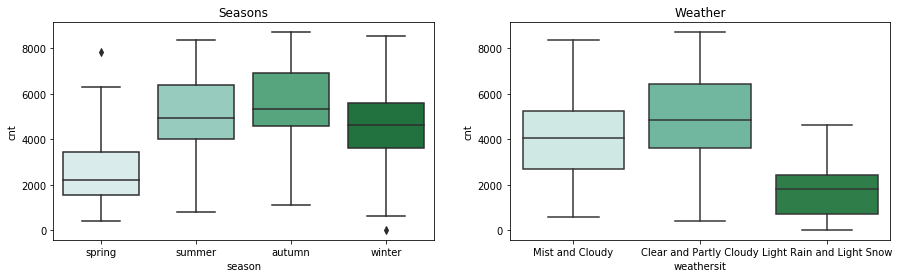

In [11]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.title("Seasons")
sns.boxplot(x = 'season', y = 'cnt', data = bikes, palette = 'BuGn')

plt.subplot(1,2,2)
plt.title("Weather")
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes, palette = 'BuGn')

#### Interpretation-
**_From the above visualization we can interpret that the count of bike rental varies in both season as well as weather we can observe that the count increases in summer and autumn season as compared to other seasons and in weathers the count have increased when there is clear weather._**

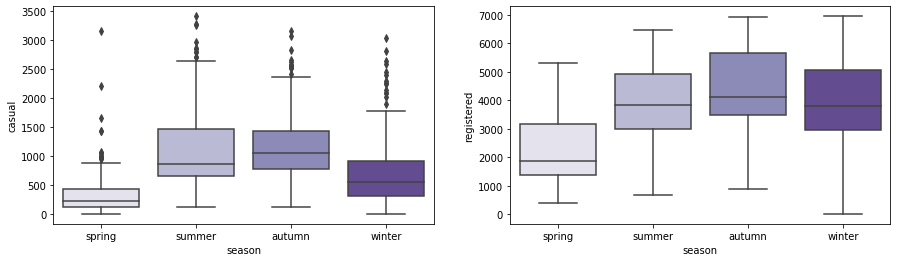

In [12]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot('season','casual', data = bikes, palette = 'Purples')

plt.subplot(1,2,2)
sns.boxplot('season','registered', data = bikes, palette = 'Purples')

#### Interpretation - 
**_From the above plot we can conclude that when plotting season with casual bike renting and registered bike renting that the causal rents have increased number during summer season whereas the number of registered bike renting have increased during autumn season, and we can see that casual counts have an increased number of outliers hence the casual variable can be dropped for a better data model._**

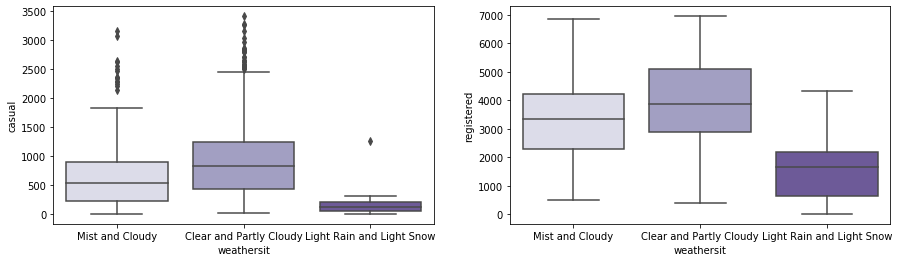

In [13]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot('weathersit','casual', data = bikes, palette = 'Purples')

plt.subplot(1,2,2)
sns.boxplot('weathersit','registered', data = bikes, palette = 'Purples')

#### Intrepretation -
**_From the above plot we can conclude that the casual bike renting have increased more during clear and partly cloudy weather and the registered bike renting have increased during mist and cloudy weather as well as clear and partly cloudy weathers. From the plots of season and weathers with casual and registered bike renting we can make sure that the renting of the bikes increases during clear weather, hence the company can do its marketing according to these weather conditions to increase its rental of biked more._**

### Creating Dummy Variable.

In [14]:
weather = pd.get_dummies(bikes['weathersit'], drop_first = True)
weather

,Light Rain and Light Snow,Mist and Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [15]:
bikes = pd.concat([bikes,weather], axis = 1)
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Light Rain and Light Snow,Mist and Cloudy
0,1,01-01-2018,spring,0,1,0,6,0,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1
1,2,02-01-2018,spring,0,1,0,0,0,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1
2,3,03-01-2018,spring,0,1,0,1,1,Clear and Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,4,04-01-2018,spring,0,1,0,2,1,Clear and Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,5,05-01-2018,spring,0,1,0,3,1,Clear and Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [16]:
seasons = pd.get_dummies(bikes['season'], drop_first = True)
seasons

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [17]:
bikes = pd.concat([bikes,seasons], axis = 1)
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,Light Rain and Light Snow,Mist and Cloudy,spring,summer,winter
0,1,01-01-2018,spring,0,1,0,6,0,Mist and Cloudy,14.110847,...,80.5833,10.749882,331,654,985,0,1,1,0,0
1,2,02-01-2018,spring,0,1,0,0,0,Mist and Cloudy,14.902598,...,69.6087,16.652113,131,670,801,0,1,1,0,0
2,3,03-01-2018,spring,0,1,0,1,1,Clear and Partly Cloudy,8.050924,...,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,4,04-01-2018,spring,0,1,0,2,1,Clear and Partly Cloudy,8.200000,...,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,5,05-01-2018,spring,0,1,0,3,1,Clear and Partly Cloudy,9.305237,...,43.6957,12.522300,82,1518,1600,0,0,1,0,0


#### Dropping the variables.
**_From the above analysis we can drop the following variables to avoid any over fitting of data, As per the bivariate analysis we concluded that we can drop the variable casual and registered as the casual variable has more numbers of outliers and the target variable includes the count of registered as well as casual hence these can be dropped to prevent the over fitting of data._**

In [18]:
bikes = bikes.drop(['weathersit','instant','season','dteday','casual','registered'], axis = 1)
bikes.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light Rain and Light Snow,Mist and Cloudy,spring,summer,winter
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0


### Splitting the train and test data.

In [19]:
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, random_state = 100)
print(bikes_train.shape)
print(bikes_test.shape)

(510, 15)
(220, 15)


### Rescaling

In [20]:
scaler = MinMaxScaler()

In [21]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
yr                           730 non-null int64
mnth                         730 non-null int64
holiday                      730 non-null int64
weekday                      730 non-null int64
workingday                   730 non-null int64
temp                         730 non-null float64
atemp                        730 non-null float64
hum                          730 non-null float64
windspeed                    730 non-null float64
cnt                          730 non-null int64
Light Rain and Light Snow    730 non-null uint8
Mist and Cloudy              730 non-null uint8
spring                       730 non-null uint8
summer                       730 non-null uint8
winter                       730 non-null uint8
dtypes: float64(4), int64(6), uint8(5)
memory usage: 60.7 KB


In [22]:
num_var = ['yr','mnth','holiday','weekday','temp','atemp','hum','windspeed','cnt','Light Rain and Light Snow','Mist and Cloudy','spring','summer','winter']
bikes_train[num_var] = scaler.fit_transform(bikes_train[num_var])
bikes_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light Rain and Light Snow,Mist and Cloudy,spring,summer,winter
576,1.0,0.545455,0.0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,0.0,0.0,0.0,0.0
426,1.0,0.181818,0.0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.0,1.0,1.0,0.0,0.0
728,1.0,1.000000,0.0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.204096,0.0,0.0,1.0,0.0,0.0
482,1.0,0.272727,0.0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.0,1.0,0.0,1.0,0.0
111,0.0,0.272727,0.0,0.833333,1,0.345824,0.318819,0.751824,0.380981,0.191095,0.0,1.0,0.0,1.0,0.0


In [23]:
bikes_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light Rain and Light Snow,Mist and Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.503743,0.025490,0.498366,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.315038,0.157763,0.336182,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Multivariate Analysis.

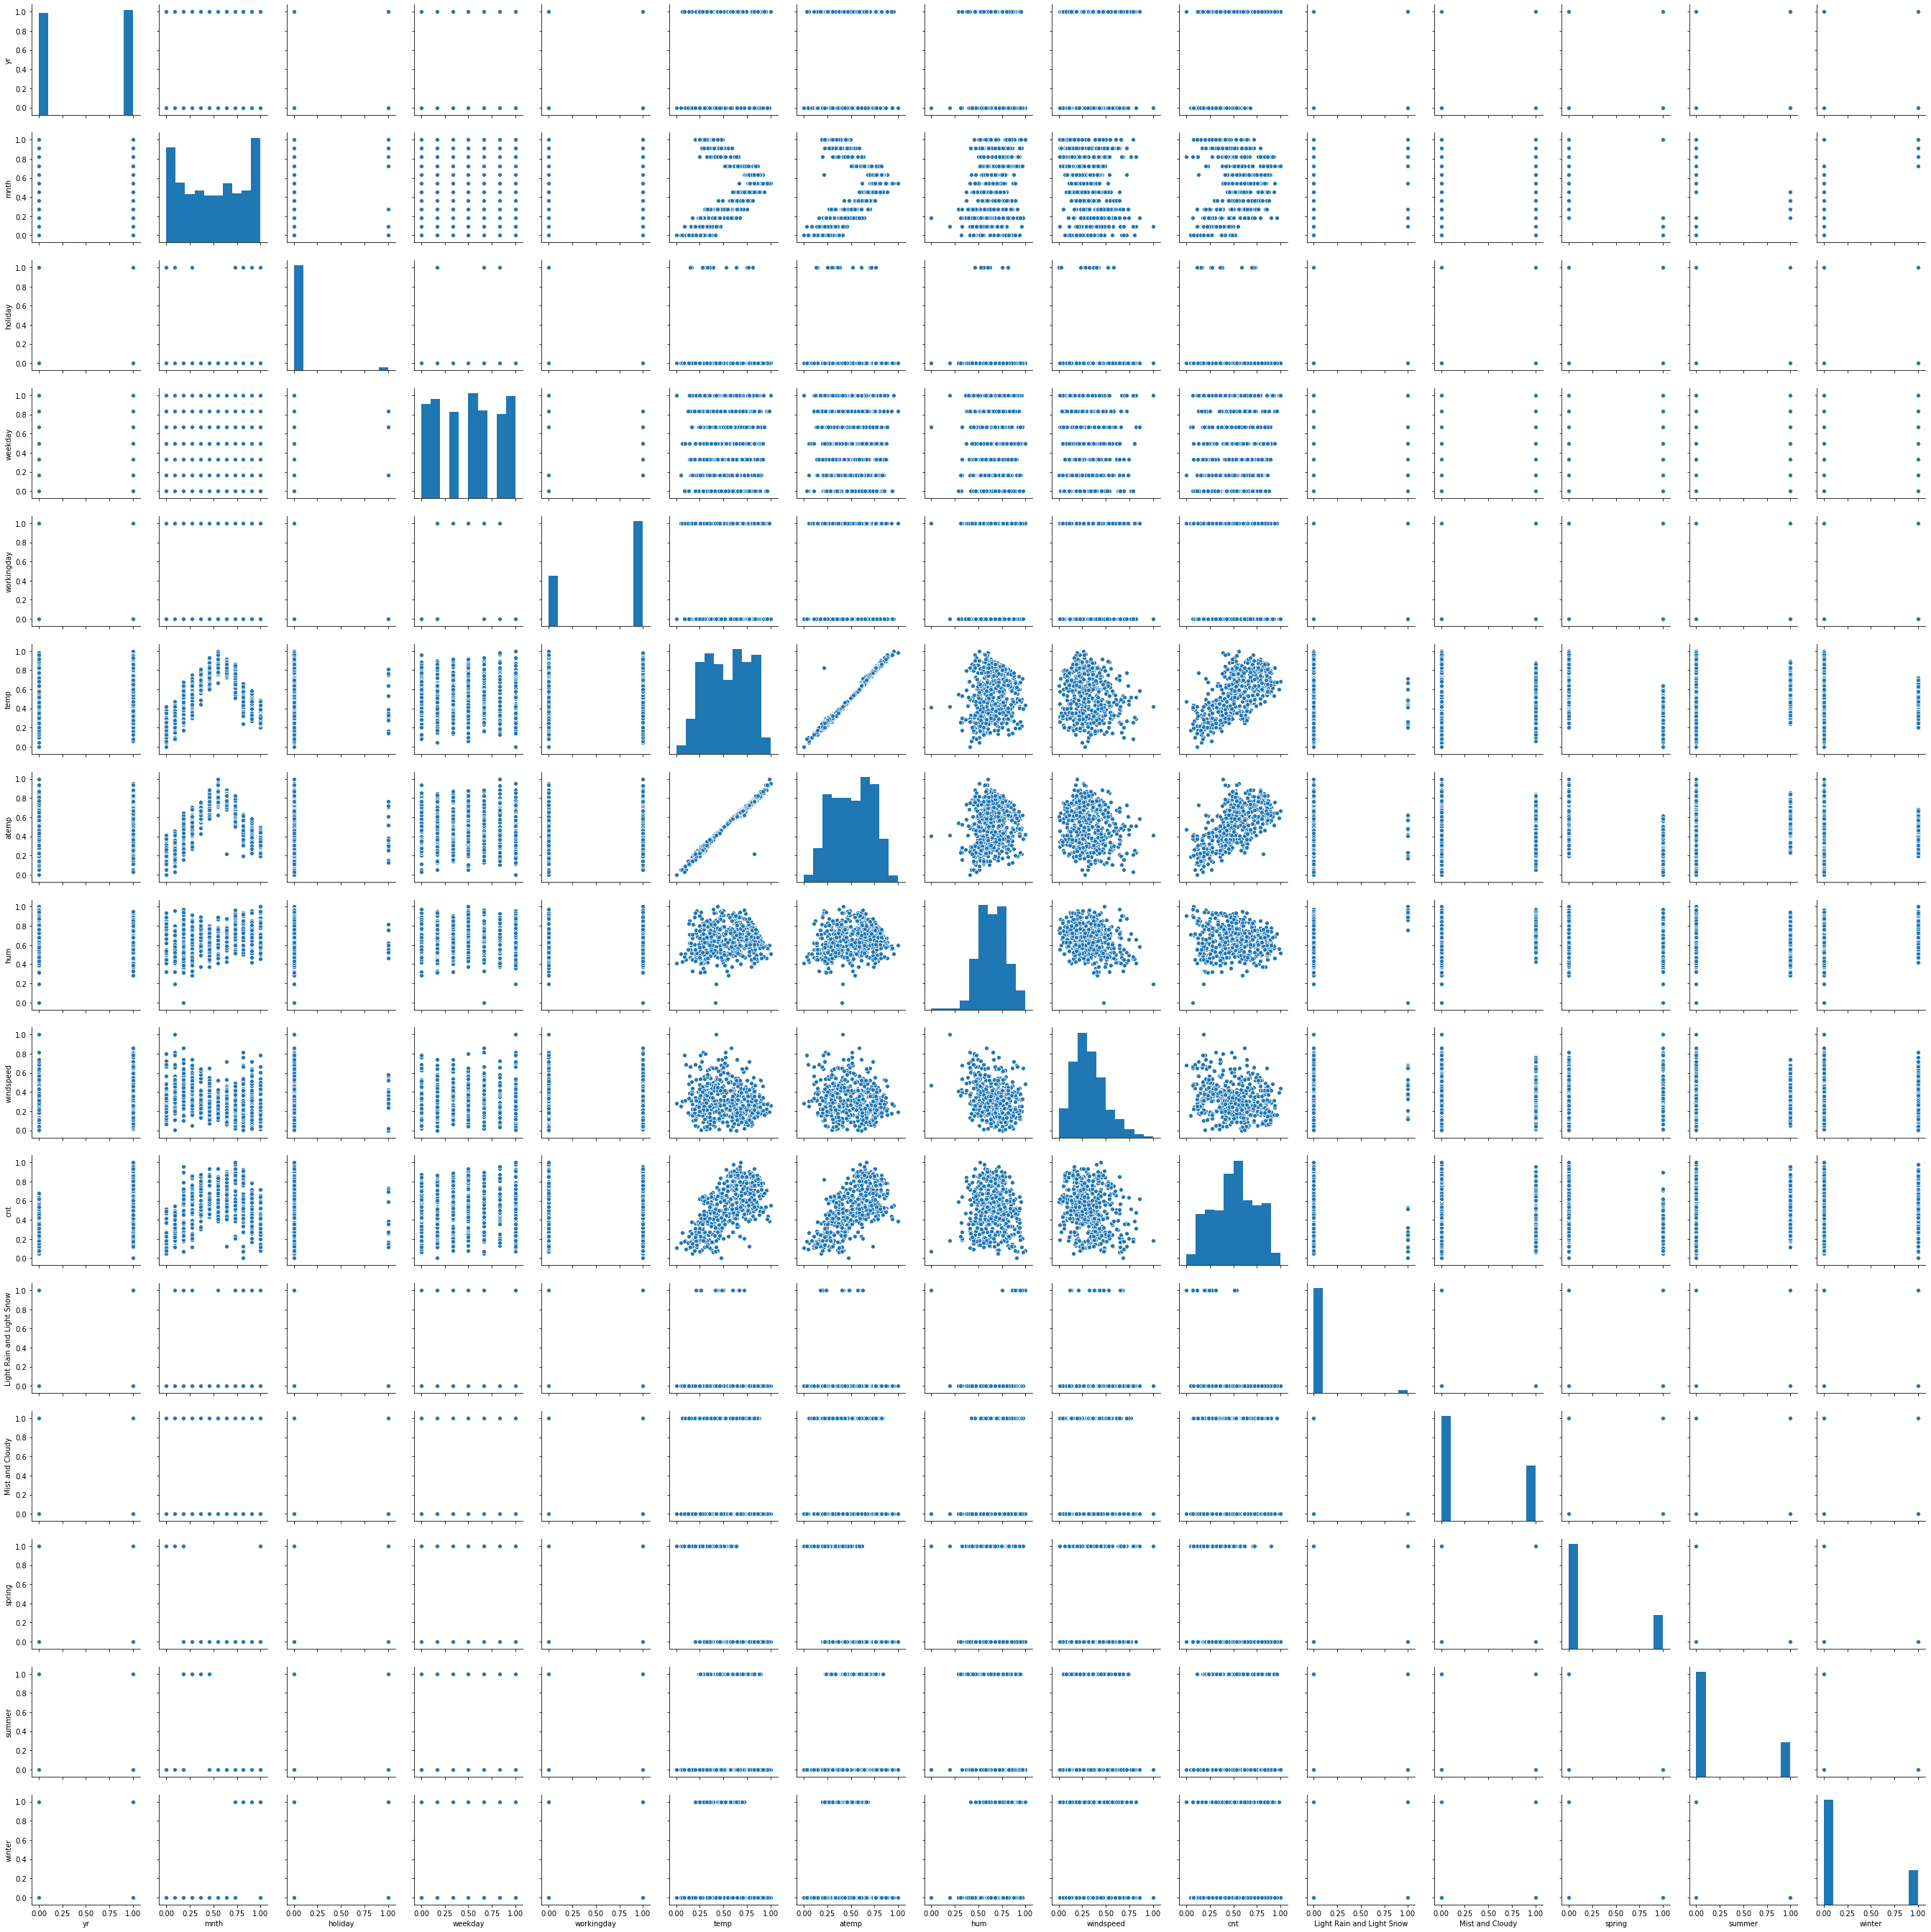

In [24]:
sns.pairplot(bikes_train)

#### Interpretation -
**_From the above pair plot analysis we can conclude that the target variable has linear relation with few of the independent variables and hence a linear model can be a fit._**

## Step 3: Training the model.

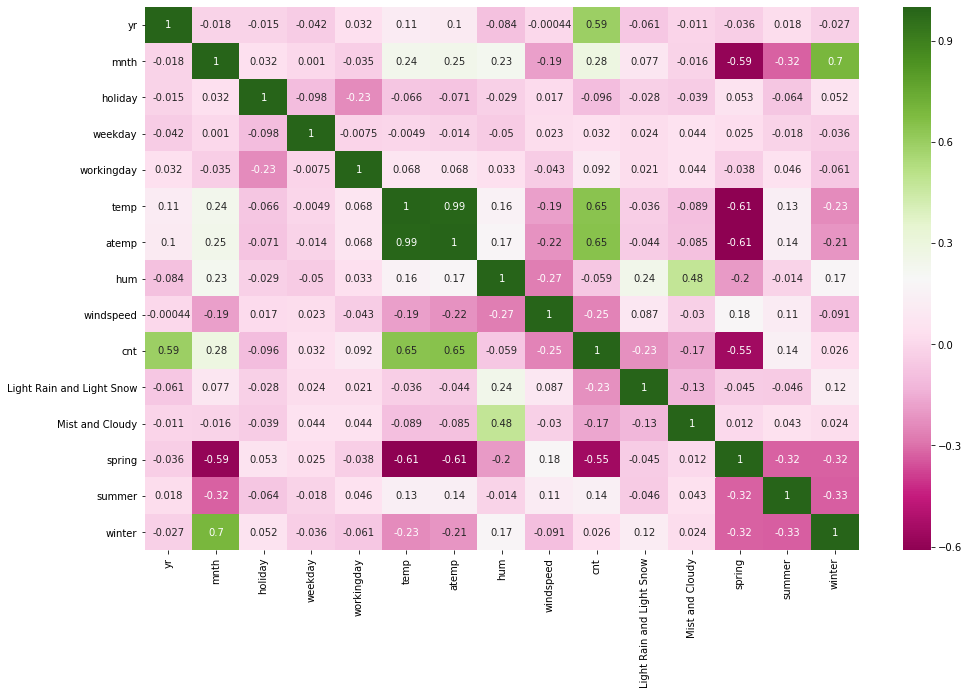

In [25]:
plt.figure(figsize = (16,10))
ax = sns.heatmap(bikes_train.corr(), annot = True, cmap = 'PiYG')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

#### Interpretation -
**_From the above heatmap we can see that there are few variables which are positively correlated and few are negatively correlated to the target variable, we can see that cnt is mostly related to temp hence we can plot a scatterplot and check ._**

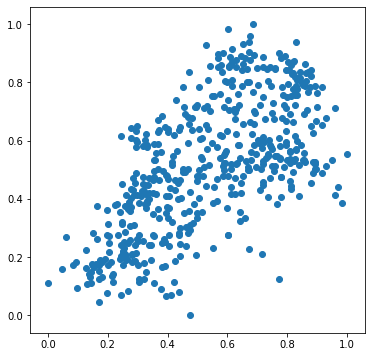

In [26]:
plt.figure(figsize = (6,6))
plt.scatter(bikes_train.temp, bikes_train.cnt)
plt.show()

**_So we take temp as the first variable and try to fit a regression line._**

#### Dividing y_train and X_train for model building.

In [27]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

In [28]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [29]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,Light Rain and Light Snow,Mist and Cloudy,spring,summer,winter
576,1.0,0.545455,0.0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.0,0.0,0.0,0.0,0.0
426,1.0,0.181818,0.0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.0,1.0,1.0,0.0,0.0
728,1.0,1.000000,0.0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.0,0.0,1.0,0.0,0.0
482,1.0,0.272727,0.0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.0,1.0,0.0,1.0,0.0
111,0.0,0.272727,0.0,0.833333,1,0.345824,0.318819,0.751824,0.380981,0.0,1.0,0.0,1.0,0.0


## Step 3 - Building a linear model.

In [30]:
X_train_sm = sm.add_constant(X_train[['temp']])
lr = sm.OLS(y_train, X_train_sm).fit()

In [31]:
lr.params

const    0.169031
temp     0.640944
dtype: float64

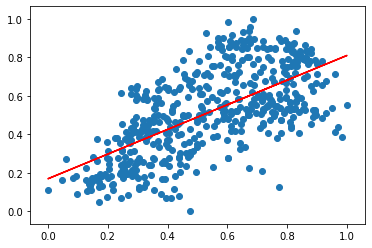

In [32]:
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.169 + 0.641*X_train_sm.iloc[:, 1], 'r')
plt.show()

#### Interpretation -
**_From the above graph we can conclude that a linear regression model can be build._**

## Step 4 - Building a model with bottoms down method.

1. Assuming the p-value or alpha to be 0.05 with 95% confidence interval.
2. Assuming the VIF value to be 5.

In [33]:
# adding a constant to X_train data frame.
X_train_sm = sm.add_constant(X_train)


In [34]:
# Linear regression
lr = sm.OLS(y_train, X_train_sm)

In [35]:
# Fit the model
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     176.8
Date:                Sun, 07 Jun 2020   Prob (F-statistic):          3.01e-182
Time:                        08:21:26   Log-Likelihood:                 495.79
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     495   BIC:                            -898.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2400      0.039      6.208      0.000       0.164       0.316
yr                            0.2322      0.008     27.702      0.000       0.216       0.249
mnth                          0.0149      0.026      0.578      0.563      -0.036       0.066
holiday                      -0.0638      0.027     -2.351      0.019      -0.117      -0.010
weekday                       0.0483      0.012      3.878      0.000       0.024       0.073
workingday                    0.0187      0.009      2.059      0.040       0.001       0.037
temp                          0.4329      0.139      3.118      0.002       0.160       0.706
atemp                         0.0628      0.142      0.443      0.658      -0.216       0.342
hum                          -0.1281      0.039     -3.288      0.001      -0.205      -0.052
windspeed                    -0.1783      0.027     -6.597      0.000      -0.231      -0.125
Light Rain and Light Snow    -0.2463      0.027     -9.024      0.000      -0.300      -0.193
Mist and Cloudy              -0.0566      0.011     -5.203      0.000      -0.078      -0.035
spring                       -0.0695      0.023     -3.013      0.003      -0.115      -0.024
summer                        0.0473      0.016      3.027      0.003       0.017       0.078
winter                        0.0835      0.019      4.472      0.000       0.047       0.120
==============================================================================
Omnibus:                       73.421   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.997
Skew:                          -0.731   Prob(JB):                     4.08e-41
Kurtosis:                       5.572   Cond. No.                         92.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretation from p-values -
**_From the summary we can conclude that the variablea atemp have high p value of 0.656 which is more than the assumed p-value of 0.05._**

#### Checking VIF for multicollinearity of the variable.

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,temp,379.33
6,atemp,366.74
7,hum,30.16
1,mnth,12.48
8,windspeed,5.02
13,winter,4.63
11,spring,4.49
4,workingday,3.20
3,weekday,3.17
12,summer,2.72


In [37]:
# We will drop atemp as its p-value is high 0.656 and high VIF 366.74.
X = X_train.drop(['atemp'], axis = 1)

#### Creating second model without atemp variable.

In [38]:

X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.7
Date:                Sun, 07 Jun 2020   Prob (F-statistic):          2.35e-183
Time:                        08:21:26   Log-Likelihood:                 495.69
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     496   BIC:                            -904.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2398      0.039      6.208      0.000       0.164       0.316
yr                            0.2321      0.008     27.721      0.000       0.216       0.249
mnth                          0.0150      0.026      0.581      0.561      -0.036       0.066
holiday                      -0.0643      0.027     -2.375      0.018      -0.118      -0.011
weekday                       0.0480      0.012      3.864      0.000       0.024       0.072
workingday                    0.0187      0.009      2.058      0.040       0.001       0.037
temp                          0.4925      0.034     14.427      0.000       0.425       0.560
hum                          -0.1273      0.039     -3.274      0.001      -0.204      -0.051
windspeed                    -0.1807      0.027     -6.817      0.000      -0.233      -0.129
Light Rain and Light Snow    -0.2470      0.027     -9.079      0.000      -0.300      -0.194
Mist and Cloudy              -0.0567      0.011     -5.218      0.000      -0.078      -0.035
spring                       -0.0684      0.023     -2.985      0.003      -0.113      -0.023
summer                        0.0485      0.015      3.152      0.002       0.018       0.079
winter                        0.0848      0.018      4.614      0.000       0.049       0.121
==============================================================================
Omnibus:                       72.086   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.883
Skew:                          -0.718   Prob(JB):                     1.94e-40
Kurtosis:                       5.558   Cond. No.                         23.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# We can remove mnth as it has high p-value of 0.561 and high VIF of 12.48.
X = X.drop(['mnth'], axis = 1)

#### Creating third model without mnth variable.

In [40]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.8
Date:                Sun, 07 Jun 2020   Prob (F-statistic):          1.89e-184
Time:                        08:21:26   Log-Likelihood:                 495.52
No. Observations:                 510   AIC:                            -965.0
Df Residuals:                     497   BIC:                            -910.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2469      0.037      6.741      0.000       0.175       0.319
yr                            0.2319      0.008     27.737      0.000       0.216       0.248
holiday                      -0.0637      0.027     -2.357      0.019      -0.117      -0.011
weekday                       0.0484      0.012      3.906      0.000       0.024       0.073
workingday                    0.0186      0.009      2.048      0.041       0.001       0.036
temp                          0.4933      0.034     14.475      0.000       0.426       0.560
hum                          -0.1252      0.039     -3.236      0.001      -0.201      -0.049
windspeed                    -0.1803      0.026     -6.810      0.000      -0.232      -0.128
Light Rain and Light Snow    -0.2479      0.027     -9.132      0.000      -0.301      -0.195
Mist and Cloudy              -0.0570      0.011     -5.261      0.000      -0.078      -0.036
spring                       -0.0744      0.020     -3.645      0.000      -0.115      -0.034
summer                        0.0444      0.014      3.245      0.001       0.018       0.071
winter                        0.0892      0.017      5.319      0.000       0.056       0.122
==============================================================================
Omnibus:                       72.339   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.291
Skew:                          -0.719   Prob(JB):                     9.59e-41
Kurtosis:                       5.570   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,hum,27.35
4,temp,15.71
6,windspeed,4.69
9,spring,3.90
3,workingday,3.19
2,weekday,3.11
11,winter,3.10
8,Mist and Cloudy,2.28
10,summer,2.28
0,yr,2.08


In [42]:
# we can remove the variable working day as it has high p-value.
X = X.drop(['workingday'], axis = 1)

#### Creating fourth model without workingay variable.


In [43]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.8
Date:                Sun, 07 Jun 2020   Prob (F-statistic):          9.89e-185
Time:                        08:21:26   Log-Likelihood:                 493.37
No. Observations:                 510   AIC:                            -962.7
Df Residuals:                     498   BIC:                            -911.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2606      0.036      7.217      0.000       0.190       0.332
yr                            0.2323      0.008     27.704      0.000       0.216       0.249
holiday                      -0.0763      0.026     -2.887      0.004      -0.128      -0.024
weekday                       0.0476      0.012      3.826      0.000       0.023       0.072
temp                          0.4945      0.034     14.465      0.000       0.427       0.562
hum                          -0.1263      0.039     -3.255      0.001      -0.203      -0.050
windspeed                    -0.1825      0.027     -6.875      0.000      -0.235      -0.130
Light Rain and Light Snow    -0.2459      0.027     -9.036      0.000      -0.299      -0.192
Mist and Cloudy              -0.0561      0.011     -5.161      0.000      -0.077      -0.035
spring                       -0.0747      0.020     -3.647      0.000      -0.115      -0.034
summer                        0.0446      0.014      3.249      0.001       0.018       0.072
winter                        0.0882      0.017      5.245      0.000       0.055       0.121
==============================================================================
Omnibus:                       77.245   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.653
Skew:                          -0.785   Prob(JB):                     4.85e-41
Kurtosis:                       5.504   Cond. No.                         20.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,hum,27.04
3,temp,15.35
5,windspeed,4.68
8,spring,3.83
2,weekday,3.11
10,winter,3.08
7,Mist and Cloudy,2.28
9,summer,2.26
0,yr,2.08
6,Light Rain and Light Snow,1.24


In [45]:
# We can remove hum as it has a high VIF of 27.04 and low p-value of 0.001.
X = X.drop(['hum'], axis = 1)

#### Creating fifth model without hum variable.

In [46]:
X_train_sm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_sm).fit()
lr_5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.5
Date:                Sun, 07 Jun 2020   Prob (F-statistic):          1.15e-183
Time:                        08:21:26   Log-Likelihood:                 488.01
No. Observations:                 510   AIC:                            -954.0
Df Residuals:                     499   BIC:                            -907.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1948      0.030      6.450      0.000       0.135       0.254
yr                            0.2355      0.008     28.001      0.000       0.219       0.252
holiday                      -0.0766      0.027     -2.870      0.004      -0.129      -0.024
weekday                       0.0515      0.012      4.118      0.000       0.027       0.076
temp                          0.4678      0.034     13.962      0.000       0.402       0.534
windspeed                    -0.1572      0.026     -6.134      0.000      -0.207      -0.107
Light Rain and Light Snow    -0.2811      0.025    -11.145      0.000      -0.331      -0.232
Mist and Cloudy              -0.0767      0.009     -8.603      0.000      -0.094      -0.059
spring                       -0.0817      0.021     -3.971      0.000      -0.122      -0.041
summer                        0.0403      0.014      2.922      0.004       0.013       0.067
winter                        0.0771      0.017      4.638      0.000       0.044       0.110
==============================================================================
Omnibus:                       75.551   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.846
Skew:                          -0.776   Prob(JB):                     2.41e-39
Kurtosis:                       5.441   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking the VIF.

In [47]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,windspeed,4.63
3,temp,4.36
2,weekday,3.10
7,spring,2.12
0,yr,2.07
8,summer,1.82
9,winter,1.68
6,Mist and Cloudy,1.54
5,Light Rain and Light Snow,1.08
1,holiday,1.05


#### Interpretation-
1. From the above both the tables we can see that this is the model that can be worked on as it has both low p-value and low VIF and all the features are significant.
2. The features do not present any multicollinearity.
3. The model has a R-squared value of 82.8% which is fairly high and it concludes that 82.8% of variance in 'cnt' is explained by the independent variables.
4. The adjusted R-squared value is of 82.5% hence the model is able to predict the target variable with least number of independent variables.
5. The features 'temp' and 'yr' have the highest positive coeff, so these variables have a high impact on the target variable 'cnt', these variables exhibit correlation and causation as well, the variable 'temp' is one of the key features which is infulencing the riders to rent the bikes, and we can see that over the years the company have gained more popularity and its reputation have increased hence the renting of biked have increased over the years.
6. The features 'Light Rain and Light Snow' and 'spring' have the highest negative coeff, so these variables have a negative impact and the company needs to take care during these conditions.
7. The Prob F(stats) value is 1.15e-183 which is equal to 0 or less than 0.05 hence proves that the model is significant and the best fit line have not occured by chance.

## Step 5 - Residual Analysis

In [48]:
y_train_predict = lr_5.predict(X_train_sm)

Text(0.5, 1.0, 'Error terms normal distribution')

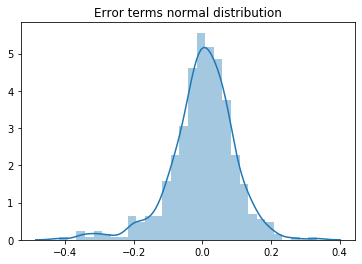

In [58]:
res = y_train - y_train_predict
sns.distplot(res)
plt.title("Error terms normal distribution")

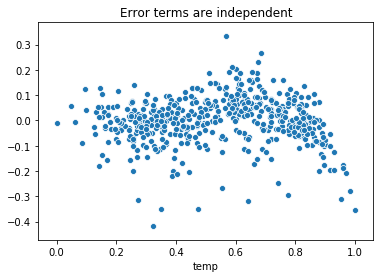

In [59]:
sns.scatterplot(x = X_train.temp, y = res)
plt.title("Error terms are independent")
plt.show()

#### Interpretation -
**_From the above plots we can conclude that the error terms are in normal distribution and are independent.._**

## Step 6 - Predictions and Evaluation on Test Set.

In [50]:
num_var = ['yr','mnth','holiday','weekday','temp','atemp','hum','windspeed','cnt','Light Rain and Light Snow','Mist and Cloudy','spring','summer','winter']
bikes_test[num_var] = scaler.transform(bikes_test[num_var])
bikes_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light Rain and Light Snow,Mist and Cloudy,spring,summer,winter
184,0.0,0.545455,1.0,0.166667,0,0.831783,0.769660,0.657364,0.084219,0.692706,0.0,1.0,0.0,0.0,0.0
535,1.0,0.454545,0.0,0.500000,1,0.901354,0.842587,0.610133,0.153728,0.712034,0.0,0.0,0.0,1.0,0.0
299,0.0,0.818182,0.0,0.666667,1,0.511964,0.496145,0.837699,0.334206,0.303382,0.0,1.0,0.0,0.0,1.0
221,0.0,0.636364,0.0,0.500000,1,0.881625,0.795343,0.437098,0.339570,0.547400,0.0,0.0,0.0,0.0,0.0
152,0.0,0.454545,0.0,0.666667,1,0.817246,0.741471,0.314298,0.537414,0.569029,0.0,0.0,0.0,1.0,0.0


In [51]:
bikes_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light Rain and Light Snow,Mist and Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.499174,0.036364,0.502273,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.311120,0.187620,0.330843,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test.

In [52]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [53]:
# Adding constant to test dataframe.
X_test_m4 = sm.add_constant(X_test)

In [54]:
# Creating X_test_m4 dataframe by dropping variables.
X_test_m4 = X_test_m4.drop(['mnth','hum','workingday','atemp'], axis = 1)

In [55]:
# Making predictions.
y_pred_m4 = lr_5.predict(X_test_m4)

In [56]:
print(r2_score(y_true = y_test, y_pred = y_pred_m4))

0.8060336146640106


#### Interpretation -
**_The test model as well has a fairly high R-squared value of 80.6% which concludes that 80.6% of the variance in 'cnt' is explained by independent variables, which is within 5% of the R-squared value of train set hence the model with the given features is significant and fit, hence we come to a conclusion that the model is fit to use and the three most impacting variables are 'temp','yr' and 'winter', so we can suggest the company to market its bike renting according to these conditions to keep a track of when they are having high count in the renting of bikes and can improve it accordingly._**